# Example of data translation using a bijective graph
The graph method creates a series of interlocking nodes that have transformations between themselves. There are a few basic rules:
1. Any node has an edge into and out of itself
2. Any path that results in the same end location creates the same node 

## This example is one of a rectangular table, a set of column modeled data. 
### This graph has the folowing nodes, and hence transformations between all of them
1. n1, 'Pandas Data Frame', in memory 
2. n2, 'AsciiDataTable', in memory
3. n3, 'HDF File', on disk
4. n4, 'XML Data Table',in memory
5. n5, 'Excel File', on disk
6. n6, 'HTML String',in memory
7. n7, 'JSON File', on disk
8. n8, 'JSON String',in memory
9. n9,'CSV File', on disk
10. n10, 'Matlab File', on disk
11. n11, 'XML File', on disk
12. n12, 'HTML File ', on disk

### Naming of translation functions
The naming of functions that translate one data format to another should follow these rules
1. When a python class is involved the name should be the class name with the same structure
2. When an on disk format is chosen it should be all lower case with underscores
3. Names should be type_1_to_type_2()
4. File names should have a parameter that can be passed

Example:
>> DataFrame_to_AsciiDataTable



In [4]:
from pyMeasure import *
from pyMeasure.Code.DataHandlers.GraphModels import *
import pandas
from scipy.io import savemat,loadmat
import re
import datetime
import numpy as np
from ipywidgets import *
import json
import networkx
import odo
import sqlite3

In [5]:
options={}
options["data"]=[[1,2,3],[4,5,6]]
options["column_names"]=['a','b','c']
table=AsciiDataTable(None,**options)
table=OnePortCalrepModel(os.path.join(TESTS_DIRECTORY,'700437.asc'))
#table=SNP(os.path.join(TESTS_DIRECTORY,'Solution_0.s4p'))
data_frame=AsciiDataTable_to_DataFrame(table)

The self.metadata["Device_Id"] variable is 700437


In [6]:
graph_options={"graph_name":"Rectangular Graph",
                  "node_names":['n1','n2'],
                  "node_descriptions":["Pandas Data Frame","AsciiDataTable"],
                  "current_node":'n1',
                  "state":[1,0],
                  "data":data_frame,
                  "edge_2_to_1":AsciiDataTable_to_DataFrame,
                  "edge_1_to_2":DataFrame_to_AsciiDataTable
                 }
rect_graph=Graph(**graph_options)

In [7]:
#print rect_graph.data

In [7]:
def DataFrame_to_hdf(pandas_data_frame):
    pandas_data_frame.to_hdf("Test.hdf","table")
    return "Test.hdf"
def hdf_to_DataFrame(hdf_file_name):
    df=pandas.read_hdf(hdf_file_name,"table")
    return df
def XMLDataTable_to_AsciiDataTable(xml_table):
    
    table=AsciiDataTable(None,
                         column_names=xml_table.attribute_names,
                         data=xml_table.data)
    return table
def AsciiDataTable_to_XMLDataTable_2(data_table):
    xml=AsciiDataTable_to_XMLDataTable(data_table)
    return xml
def DataFrame_to_excel(pandas_data_frame,file_name="Test.xlsx"):
    pandas_data_frame.to_excel(file_name,index=False)
    return file_name

def excel_to_DataFrame(excel_file_name):
    df=pandas.read_excel(excel_file_name)
    return df
def DataFrame_to_HTML_string(pandas_data_frame):
    html=pandas_data_frame.to_html(index=False)
    return html

def HTML_string_to_DataFrame(html_string):
    list_df=pandas.read_html(html_string)
    return list_df[0]
def DataFrame_to_json(pandas_data_frame):
    json=pandas_data_frame.to_json("test.json",orient='records')
    return "test.json"

def json_to_DataFrame(json_file_name):
    data_frame=pandas.read_json(json_file_name,orient='records')
    return data_frame

def DataFrame_to_json_string(pandas_data_frame):
    json=pandas_data_frame.to_json(orient='records')
    return json

def json_string_to_DataFrame(json_string):
    data_frame=pandas.read_json(json_string,orient='records')
    return data_frame

def DataFrame_to_csv(pandas_data_frame,file_name="test.csv"):
    csv=pandas_data_frame.to_csv(file_name,index=False)
    return file_name

def csv_to_DataFrame(csv_file_name):
    data_frame=pandas.read_csv(csv_file_name)
    return data_frame

def AsciiDataTable_to_Matlab(ascii_data_table,file_name="test.mat"):
    matlab_data_dictionary={"data":ascii_data_table.data,"column_names":ascii_data_table.column_names}
    savemat(file_name,matlab_data_dictionary)
    return file_name

def Matlab_to_AsciiDataTable(matlab_file_name):
    matlab_data_dictionary=loadmat(matlab_file_name)
    ascii_data_table=AsciiDataTable(None,
                                    column_names=map(lambda x: x.rstrip().lstrip(),
                                                     matlab_data_dictionary["column_names"].tolist()),
                                     data=matlab_data_dictionary["data"].tolist())
    return ascii_data_table

def DataTable_to_XML(xml_data_table,file_name="test.xml"):
    xml_data_table.save(file_name)
    return file_name

def XML_to_DataTable(xml_file_name):
    xml_data_table=DataTable(xml_file_name)
    return xml_data_table

def html_string_to_html_file(html_string,file_name="test.html"):
    out_file=open(file_name,'w')
    out_file.write(html_string)
    out_file.close()
    return file_name
# this is broken, something does not work properly
def html_file_to_pandas(html_file_name):
    in_file=open(html_file_name,'r')
    pandas_data_frame=pandas.read_html(in_file)
    return pandas_data_frame

def html_file_to_html_string(html_file_name):
    in_file=open(html_file_name,'r')
    html_string=in_file.read()
    return html_string

def DataFrame_to_html_file(pandas_data_frame,file_name="test.html"):
    out_file=open(file_name,'w')
    pandas_data_frame.to_html(out_file,index=False)
    return file_name

def json_to_DataTable(json_file_name):
    data_dictionary_list=json.load(open(json_file_name,'r'))
    xml=DataTable(None,data_dictionary={"data":data_dictionary_list})
    return xml

def csv_to_AsciiDataTable(csv_file_name):
    options={"column_names_begin_line":0,"column_names_end_line":1,
             "data_begin_line":1,"data_end_line":-1,"data_delimiter":",","column_names_delimiter":","}
    table=AsciiDataTable(csv_file_name,**options)
    return table

def DataFrame_to_sqlite(pandas_data_frame,file_name="test.db",table_name="data"):
    """Transforms a pandas.DataFrame to a table in an sqlite database"""
#     connection=sqlite3.connect(file_name)
#     connection.close()
    sql_url="sqlite:///{0}::{1}".format(file_name,table_name)
    odo.odo(pandas_data_frame,sql_url)
    return sql_url

def sqlite_to_DataFrame(sqlite_url):
    """Creates a pandas.DataFrame from a table in an sqlite database (use sqlite:///file_name::table_name)"""
    pandas_data_frame=odo.odo(sqlite_url,pandas.DataFrame)
    return pandas_data_frame
def identity(parameter):
    return parameter

In [8]:
# need to rename these Model1_to_Model2
rect_graph.add_node("n3","n1",DataFrame_to_hdf,"n1",hdf_to_DataFrame)
rect_graph.node_descriptions.append("HDF File")
rect_graph.add_node("n4","n2",AsciiDataTable_to_XMLDataTable_2,"n2",XMLDataTable_to_AsciiDataTable)
rect_graph.node_descriptions.append("XML Data Table")

# Need to add XML File and Html File using save and save_HTML()
rect_graph.add_node("n5","n1",DataFrame_to_excel,"n1",excel_to_DataFrame)
rect_graph.node_descriptions.append("Excel File")
rect_graph.add_node("n6","n1",DataFrame_to_HTML_string,"n1",HTML_string_to_DataFrame)
rect_graph.node_descriptions.append("HTML String")

# Note a lot of the pandas reading and writing cause float64 round off errors
# applymap(lambda x: np.around(x,10) any all float fields will fix this
# also the column names move about in order
rect_graph.add_node("n7","n1",DataFrame_to_json,"n1",json_to_DataFrame)
rect_graph.node_descriptions.append("JSON File")
rect_graph.add_node("n8","n1",DataFrame_to_json_string,"n1",json_string_to_DataFrame)
rect_graph.node_descriptions.append("JSON String")
rect_graph.add_node("n9","n1",DataFrame_to_csv,"n1",csv_to_DataFrame)
rect_graph.node_descriptions.append("CSV File")
rect_graph.add_node("n10","n2",AsciiDataTable_to_Matlab,"n2",Matlab_to_AsciiDataTable)
rect_graph.node_descriptions.append("Matlab File")
rect_graph.add_node("n11","n4",DataTable_to_XML,"n4",XML_to_DataTable)
rect_graph.node_descriptions.append("XML File")
rect_graph.add_node("n12","n6",html_string_to_html_file,"n6",html_file_to_html_string)
rect_graph.node_descriptions.append("HTML File")
# rect_graph.add_node("n13","n1",DataFrame_to_sqlite,"n1",sqlite_to_DataFrame)
# rect_graph.node_descriptions.append("sqlite table")
rect_graph.add_node("n13","n1",identity,"n1",identity)
rect_graph.node_descriptions.append("Identity")
rect_graph.add_edge("n1","n12",DataFrame_to_html_file)
rect_graph.add_edge("n7","n4",json_to_DataTable)
rect_graph.add_edge("n9","n2",csv_to_AsciiDataTable)

In [9]:
def jump_to_html_string(xml_data_table,style_sheet=os.path.join(TESTS_DIRECTORY,XSLT_REPOSITORY,"DEFAULT_MEASUREMENT_STYLE.xsl")):
    """Creates a html string from an xml data table"""
    return xml_data_table.to_HTML(style_sheet)
def jump_to_html_file(xml_data_table,style_sheet=os.path.join(TESTS_DIRECTORY,XSLT_REPOSITORY,"DEFAULT_MEASUREMENT_STYLE.xsl"),file_path=None):
    """creates a html file from an xml data table"""
    xml_data_table.save_HTML(style_sheet,file_path=file_path)
    if file_path is None:
        file_path=xml_data_table.path.replace('.xml','.html')
    return file_path
rect_graph.add_external_node("ex1","n4",jump_to_html_string)
rect_graph.external_node_descriptions.append("html_string")
rect_graph.add_external_node("ex2","n4",jump_to_html_file)
rect_graph.external_node_descriptions.append("html_file")
rect_graph.add_external_node("ex3","n1",DataFrame_to_sqlite)
rect_graph.external_node_descriptions.append("Sqlite3")

In [12]:
%matplotlib inline
rect_graph.set_state("n5","Book1.xlsx")
rect_graph.move_to_node("n1")
def move_and_show(end_node_number):
    node=rect_graph.node_names[end_node_number]
    rect_graph.move_to_node(node)
    print("*"*80)
    print("{0}".format(rect_graph.node_descriptions[end_node_number])+" {0}".format(rect_graph.state))
    print("*"*80)
    rect_graph.show(descriptions=True)
    
interact(move_and_show,end_node_number=(0,len(rect_graph.node_names)-1,1))

['edge_n11_n4_000', 'edge_n4_n2_000', 'edge_n2_n1_000', 'edge_n1_n5_000']
moving n11 -> n4


ExpatError: not well-formed (invalid token): line 6, column 16

In [33]:
path=rect_graph.get_path("n1","n11")

In [35]:
new_path=remove_circular_paths(path)

In [36]:
new_path

['edge_n1_n13_000', 'edge_n13_n1_000']

In [12]:
html_file_name=rect_graph.jump_to_external_node("ex2")

['edge_n2_n4_000']
moving n2 -> n4


In [13]:
rect_graph.jumps

['jump_n4_ex1_000', 'jump_n4_ex2_000']

In [86]:
class ColumnModeledGraph(Graph):
    """Class that transforms column modeled data from one format to another, use set_state to intialize to
    your data"""
    def __init__(self,**options):
        defaults={"graph_name":"Column Modeled Graph",
                  "node_names":['n1','n2'],
                  "node_descriptions":["Pandas Data Frame","AsciiDataTable"],
                  "current_node":'n1',
                  "state":[1,0],
                  "data":pandas.DataFrame([[1,2,3],[3,4,5]],columns=["a","b","c"]),
                  "edge_2_to_1":AsciiDataTable_to_DataFrame,
                  "edge_1_to_2":DataFrame_to_AsciiDataTable}
        self.options={}
        for key,value in defaults.iteritems():
            self.options[key]=value
        for key,value in options.iteritems():
            self.options[key]=value
        Graph.__init__(self,**self.options)
        self.add_node("n3","n1",DataFrame_to_hdf,"n1",hdf_to_DataFrame)
        self.node_descriptions.append("HDF File")
        self.add_node("n4","n2",AsciiDataTable_to_XMLDataTable_2,"n2",XMLDataTable_to_AsciiDataTable)
        self.node_descriptions.append("XML Data Table")
        
        # Need to add XML File and Html File using save and save_HTML()
        self.add_node("n5","n1",DataFrame_to_excel,"n1",excel_to_DataFrame)
        self.node_descriptions.append("Excel File")
        self.add_node("n6","n1",DataFrame_to_HTML_string,"n1",HTML_string_to_DataFrame)
        self.node_descriptions.append("HTML String")
        
        # Note a lot of the pandas reading and writing cause float64 round off errors
        # applymap(lambda x: np.around(x,10) any all float fields will fix this
        # also the column names move about in order
        self.add_node("n7","n1",DataFrame_to_json,"n1",json_to_DataFrame)
        self.node_descriptions.append("JSON File")
        self.add_node("n8","n1",DataFrame_to_json_string,"n1",json_string_to_DataFrame)
        self.node_descriptions.append("JSON String")
        self.add_node("n9","n1",DataFrame_to_csv,"n1",csv_to_DataFrame)
        self.node_descriptions.append("CSV File")
        self.add_node("n10","n2",AsciiDataTable_to_Matlab,"n2",Matlab_to_AsciiDataTable)
        self.node_descriptions.append("Matlab File")
        self.add_node("n11","n4",DataTable_to_XML,"n4",XML_to_DataTable)
        self.node_descriptions.append("XML File")
        self.add_node("n12","n6",html_string_to_html_file,"n6",html_file_to_html_string)
        self.node_descriptions.append("HTML File")
        self.add_edge("n1","n12",DataFrame_to_html_file)
        self.add_edge("n7","n4",json_to_DataTable)
        self.add_edge("n9","n2",csv_to_AsciiDataTable)
        
    

In [51]:
transform.set_state(node_data="test.xlsx",node_name="n5")

In [122]:
data=csv_to_AsciiDataTable(transform.data)

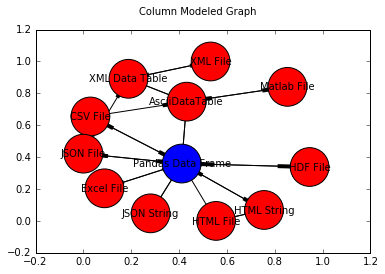

In [129]:
transform.show(descriptions=True)

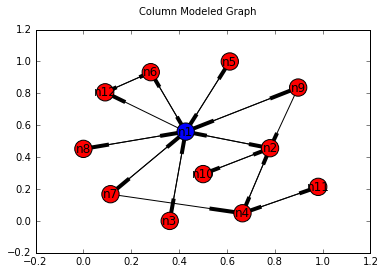

In [130]:
transform.show(descriptions=False)

In [15]:
rect_graph.move_to_node("n3")

['edge_n2_n1_000', 'edge_n1_n3_000']
moving n2 -> n1
moving n1 -> n3


In [703]:
rect_graph.get_entering_edges("n12")

['edge_n6_n12_000', 'edge_n1_n12_000']

In [8]:
path=rect_graph.get_path("n11","n12")

In [621]:
rect_graph.get_exiting_edges("n1")

['edge_n1_n2_000',
 'edge_n1_n3_000',
 'edge_n1_n5_000',
 'edge_n1_n6_000',
 'edge_n1_n7_000',
 'edge_n1_n8_000',
 'edge_n1_n9_000',
 'edge_n1_n12_000']

In [705]:
path=rect_graph.get_path("n11","n12")

next_edge was already in path


In [120]:
rect_graph.get_path("n9","n2")

['edge_n9_n1_000', 'edge_n1_n2_000']

In [9]:
path

['edge_n11_n4_000', 'edge_n4_n2_000', 'edge_n2_n1_000', 'edge_n1_n12_000']

In [544]:
def remove_circular_paths(path):
    """Removes pieces of the path that just end on the same node"""
    edge_pattern=re.compile("edge_(?P<begin_node>\w+)_(?P<end_node>\w+)_(?P<iterator>\w+)")
    past_locations=[]
    
    for index,edge in enumerate(path):
        match=re.match(edge_pattern,edge)
        begin_node=match.groupdict()["begin_node"]
        end_node=match.groupdict()["end_node"]
        past_locations.append(begin_node)
        #print("{0} is {1}".format("past_locations",past_locations))
    new_path=[]
    node_index=0
    between_list=[False for item in past_locations]
    while(node_index<len(past_locations)):
        node=past_locations[node_index]
        old_path=new_path
        new_path=[]
        
        if past_locations.count(node)>1:
            equality_list=map(lambda x:x==node,past_locations)
            between=False
            for index,equality in enumerate(equality_list):
                if equality:
                    between=not between
                    between_list[index]=between or between_list[index]
                else:
                    between_list[index]=between or between_list[index] 
        #print("{0} is {1}".format("between_list",between_list))
        for index,item in enumerate(between_list):
            if not item:
                new_path.append(path[index])
        node_index+=1

    if new_path in [[]]:
        new_path=path
                    
    return new_path

In [498]:
test_nodes=["n4","n11","n4","n2","n1","n5"]
print test_nodes.count("n4")
print test_nodes.index("n4")
#del test_nodes[0:2]
truth_list=map(lambda x:x=="n4",test_nodes)
out_list=[]
non_circular=[]
between=False
for index,truth in enumerate(truth_list):
    if truth:
        between=not between
        out_list.append(between)
    else:
        out_list.append(between)
for index,item in enumerate(out_list):
    if not item:
        non_circular.append(test_nodes[index])
    
print out_list
print non_circular

2
0
[True, True, False, False, False, False]
['n4', 'n2', 'n1', 'n5']


In [545]:
print remove_circular_paths(['edge_n4_n11_000',
 'edge_n11_n4_000',
 'edge_n4_n2_000',
 'edge_n2_n1_000',
 'edge_n1_n5_000','edge_n5_n1_000',
 'edge_n1_n5_000'])

between_list is [True, True, False, False, False, False, False]
between_list is [True, True, False, False, False, False, False]
between_list is [True, True, False, False, False, False, False]
between_list is [True, True, False, False, False, False, False]
between_list is [True, True, False, False, True, True, False]
between_list is [True, True, False, False, True, True, False]
between_list is [True, True, False, False, True, True, False]
['edge_n4_n2_000', 'edge_n2_n1_000', 'edge_n1_n5_000']


In [258]:
rect_graph.move_to(path)

['edge_n4_n2_000', 'edge_n2_n1_000', 'edge_n1_n5_000']
moving n4 -> n2
moving n2 -> n1
moving n1 -> n5


In [117]:
rect_graph.move_to_node("n2")

['edge_n9_n1_000', 'edge_n1_n2_000']
moving n9 -> n1
moving n1 -> n2


In [ ]:
xml=AsciiDataTable_to_XMLDataTable(table)

In [ ]:
xml.to_tuple_list(xml.get_attribute_names())

In [ ]:
xml.to_list("a")

In [ ]:
xml.attribute_names

In [ ]:
xml.data

In [ ]:
rect_graph.state

In [ ]:
path=rect_graph.get_path("n5","n1")

In [ ]:
rect_graph.path_length(path)

In [ ]:
rect_graph.move_to_node("n1")

In [8]:
path=['edge_n1_n12_000', 'edge_n12_n6_000', 'edge_n6_n1_000', 'edge_n1_n13_000', 'edge_n13_n1_000', 'edge_n1_n9_000', 'edge_n9_n2_000', 'edge_n2_n4_000', 'edge_n4_n11_000']
print remove_circular_paths(path)

['edge_n1_n13_000', 'edge_n13_n1_000']


In [92]:
rect_graph.move_to_node("n1")
for node in rect_graph.node_names:
    path=rect_graph.get_path("n1",node)
    print(path)
    print("The length of the path n1-> {0} in s is {1}".format(node,rect_graph.path_length(path)))

['edge_n13_n1_000']
moving n13 -> n1
['edge_n1_n2_000', 'edge_n2_n1_000']
The length of the path n1-> n1 in s is 0.016
['edge_n1_n2_000']
The length of the path n1-> n2 in s is 0.0135
['edge_n1_n3_000']
The length of the path n1-> n3 in s is 0.0087
['edge_n1_n2_000', 'edge_n2_n4_000']
The length of the path n1-> n4 in s is 0.0758
['edge_n1_n5_000']
The length of the path n1-> n5 in s is 0.1257
['edge_n1_n6_000']
The length of the path n1-> n6 in s is 0.1153
['edge_n1_n7_000']
The length of the path n1-> n7 in s is 0.0052
['edge_n1_n8_000']
The length of the path n1-> n8 in s is 0.0005
['edge_n1_n9_000']
The length of the path n1-> n9 in s is 0.0088
['edge_n1_n2_000', 'edge_n2_n10_000']
The length of the path n1-> n10 in s is 0.0152
['edge_n1_n9_000', 'edge_n9_n2_000', 'edge_n2_n4_000', 'edge_n4_n11_000']
The length of the path n1-> n11 in s is 0.107
['edge_n1_n6_000', 'edge_n6_n12_000']
The length of the path n1-> n12 in s is 0.122
['edge_n1_n13_000']
Warning the path length is less th

In [28]:
path=rect_graph.get_path("n1","n11")

['edge_n1_n13_000', 'edge_n13_n1_000']

In [12]:
path=['edge_n1_n12_000', 'edge_n12_n6_000', 
 'edge_n6_n1_000', 'edge_n1_n9_000', 'edge_n9_n2_000', 'edge_n2_n4_000', 'edge_n4_n11_000']
print remove_circular_paths(path)

['edge_n1_n9_000', 'edge_n9_n2_000', 'edge_n2_n4_000', 'edge_n4_n11_000']


In [115]:
rect_graph.move_to_node("n4")

['edge_n7_n4_000']
moving n7 -> n4


In [ ]:
html=rect_graph.data.to_html(index=False)

In [ ]:
df=pandas.read_html(html)

In [ ]:
rect_graph.edges

In [ ]:
table=OnePortCalrepModel(os.path.join(TESTS_DIRECTORY,'700437.asc'))
rect_graph.set_state("n2",table)

In [113]:
rect_graph.move_to_node("n7")

['edge_n2_n1_000', 'edge_n1_n7_000']
moving n2 -> n1
moving n1 -> n7


In [ ]:
print rect_graph.data

In [ ]:
from ipywidgets import *


In [15]:
rect_graph.set_state("n5","Book1.xlsx")

['edge_n1_n7_000']
moving n1 -> n7
********************************************************************************
JSON File [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
********************************************************************************


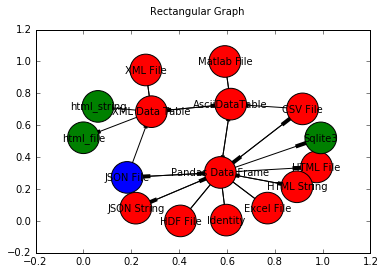

<function __main__.move_and_show>

In [16]:
%matplotlib inline
rect_graph.move_to_node("n1")
def move_and_show(end_node_number):
    node=rect_graph.node_names[end_node_number]
    rect_graph.move_to_node(node)
    print("*"*80)
    print("{0}".format(rect_graph.node_descriptions[end_node_number])+" {0}".format(rect_graph.state))
    print("*"*80)
    rect_graph.show(descriptions=True)
    
interact(move_and_show,end_node_number=(0,len(rect_graph.node_names)-1,1))

In [17]:
def move_and_print(end_node_number):
    node=rect_graph.node_names[end_node_number]
    rect_graph.move_to_node(node)
    print("*"*80)
    print("{0}".format(rect_graph.node_descriptions[end_node_number])+" {0}".format(rect_graph.state))
    print("*"*80)
    print rect_graph.data
    
interact(move_and_print,end_node_number=(0,len(rect_graph.node_names)-1,1))

['edge_n3_n1_000', 'edge_n1_n2_000']
moving n3 -> n1
moving n1 -> n2
********************************************************************************
AsciiDataTable [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
********************************************************************************
Column_1,Coulmn_2
1,1


In [ ]:
json=data_frame.to_json("test.json",orient='records')

In [ ]:
json_string=data_frame.to_json(orient='records')

In [ ]:
new_df=pandas.read_json(json_string,orient='records')

In [ ]:
new_df=pandas.read_json("test.json",orient='records')

In [ ]:
#str(table.get_data_dictionary_list())
json

In [14]:
xml=DataTable("test.xml")

ExpatError: not well-formed (invalid token): line 6, column 16

In [ ]:
import json
test_list=json.load(open("test.json",'r'))

In [ ]:
text_xml=DataTable(None,**{"data_dictionary":{"data":test_list}})

In [ ]:
#print text_xml

In [ ]:
rect_graph.edges

In [ ]:
rect_graph.move_to_node("n7")

In [ ]:
rect_graph.move_to_node("n4")

In [ ]:
#print rect_graph.data

In [ ]:
from scipy.io import savemat,loadmat

In [ ]:
savemat("data.mat",{"data":table.data,"column_names":table.column_names})

In [ ]:
data=loadmat("data.mat")

In [ ]:
new_table=AsciiDataTable(None,column_names=map(lambda x: x.rstrip().lstrip(),data["column_names"].tolist()),
                         data=data["data"].tolist())

In [ ]:
rect_graph.move_to_node("n4")
xml=rect_graph.data

In [ ]:
import sqlite3
import odo

In [ ]:
data_frame.dtypes[0]

In [ ]:
conn = sqlite3.connect("test.db")
conn.execute("create table data")
odo.odo(data_frame,'sqlite:///test.db::data')

In [15]:
one_port=OnePortCalrepModel(os.path.join(TESTS_DIRECTORY,'700437.asc'))

The self.metadata["Device_Id"] variable is 700437


In [ ]:
one_port.header

In [ ]:
one_port.column_names

In [18]:
one_port.metadata

{'Analysis_Date': '16-Oct-15', 'Device_Id': '700437'}

In [19]:
for element in one_port.elements:
    print element

header
column_names
data
footer
inline_comments
metadata


In [ ]:
header_table=pandas.DataFrame(one_port.header,columns=["Header_Line_Content"])
data_table=pandas.DataFrame(one_port.data,columns=one_port.column_names)
footer_table=pandas.DataFrame(one_port.footer,columns=["Footer_Line_Content"])
inline_comments=pandas.DataFrame(one_port.footer,columns=["Line","Location","Comment"])
metadata_table=pandas.DataFrame([[key,value] for key,value in one_port.metadata.iteritems() ], 
                                columns=["Property","Value"])

In [ ]:
header_table

In [129]:
# Move this to a DataTable Graph Example
def AsciiDataTable_to_DataFrame_dict(AsciiDataTable):
    """Converts an AsciiDataTable to a dictionary of pandas.DataFrame s"""
    output_dict={}
    for element in AsciiDataTable.elements:
        #print("{0} is {1}".format('element',element))
        if AsciiDataTable.__dict__[element]:
            if re.search('header',element,re.IGNORECASE):
                header_table=pandas.DataFrame(AsciiDataTable.header,columns=["Header_Line_Content"])
                output_dict["Header"]=header_table
            # needs to be before data search    
            elif re.search('meta',element,re.IGNORECASE):
                #print("{0} is {1}".format('element',element))
                metadata_table=pandas.DataFrame([[key,value] for key,value in AsciiDataTable.metadata.iteritems()], 
                                columns=["Property","Value"])
                output_dict["Metadata"]=metadata_table    
            elif re.search('data|^meta',element,re.IGNORECASE):
                
                data_table=pandas.DataFrame(AsciiDataTable.data,columns=AsciiDataTable.column_names)
                output_dict["Data"]=data_table
                
            elif re.search('footer',element,re.IGNORECASE):
                footer_table=pandas.DataFrame(AsciiDataTable.footer,columns=["Footer_Line_Content"])
                output_dict["Footer"]=footer_table
                
            elif re.search('comment',element,re.IGNORECASE):
                comments=AsciiDataTable.__dict__[element]
                inline_comments=pandas.DataFrame(comments,columns=["Comment","Line","Location"])
                output_dict["Comments"]=inline_comments
    return output_dict

def DataFrame_dict_to_AsciiDataTable(DataFrame_dict,**options):
    """Given a dictionary of pandas DataFrames returns an AsciiDataTable"""
    defaults={"inline_comment_begin":"!","inline_comment_end":"\n"}
    table_options={}
    for key,value in defaults.iteritems():
        table_options[key]=value
    for key,value in options.iteritems():
        table_options[key]=value
    keys=DataFrame_dict.keys()
    for key in keys:
        table_key=key
        if key in["comments","Comments","inline_comments","Inline_Comments"]:
            table_key="inline_comments"
        if key in ["data","Data"]:
            table_options["column_names"]=DataFrame_dict[key].columns.tolist()
            
        table_options[table_key.lower()]=DataFrame_dict[key].as_matrix().tolist()
    new_table=AsciiDataTable(None,**table_options)
    return new_table
        
    

In [43]:
panda_dict=AsciiDataTable_to_DataFrame_dict(one_port)

In [44]:
panda_dict["Metadata"]

,Property,Value
0,Analysis_Date,16-Oct-15
1,Device_Id,700437


In [46]:
#panda_dict["Data"]

In [107]:
def DataFrame_dict_to_excel(DataFrame_dict,excel_file_name="Test.xlsx"):
    """Converts a dictionary of pandas DataFrames to a single excel file with sheet names
    determined by keys"""
    # sort the keys so that they will display in the same order
    writer = pandas.ExcelWriter(excel_file_name)
    keys=sorted(DataFrame_dict.keys())
    for key in keys:
        #print key
        DataFrame_dict[key].to_excel(writer,sheet_name=key,index=False)
    writer.close()
    return excel_file_name

def excel_to_DataFrame_dict(excel_file_name):
    """Reads an excel file into a dictionary of data frames"""
    data_frame_dictionary=pandas.read_excel(excel_file_name,sheetname=None)
    return data_frame_dictionary

def DataFrame_dict_to_hdf(DataFrame_dict,hdf_file_name="Test.hd5"):
    """Transforms a dictionary of pandas.DataFrames to a single HD5 file with groups determined by the keys"""
    keys=sorted(DataFrame_dict.keys())
    for key in keys:
        DataFrame_dict[key].to_hdf(hdf_file_name,key)
    return hdf_file_name

def hdf_to_DataFrame_dict(hdf_file_name):
    """Creates a dictionary of pandas.DataFrames given a hd5 file name, does this require the table names?
    """
    hdf=h5py.File(hdf_file_name)
    keys=hdf.keys()
    pandas_dictionary={key:pandas.read_hdf(hdf_file_name,key) for key in keys}
    return pandas_dictionary
    

In [ ]:
DataFrame_dict_to_excel(panda_dict)

In [ ]:
test_dict=pandas.read_excel("Test.xlsx",sheetname=None)

In [ ]:
test_dict["Header"]

In [48]:
raw_table=TwoPortRawModel(os.path.join(TESTS_DIRECTORY,'TestFileTwoPortRaw.txt'))

In [49]:
test_dict=AsciiDataTable_to_DataFrame_dict(raw_table)

In [50]:
test_dict.keys()

['Header', 'Data', 'Metadata']

In [40]:
test_dict["Metadata"]

,Property,Value
0,Connector_Type_Calibration,
1,Number_Connects,3
2,Connector_Type_Measurement,N
3,Number_Repeats,1
4,Operator,BFR
5,Number_Frequencies,53
6,Start_Frequency,7
7,Measurement_Date,9 Sep 2015
8,Program_Used,MEASLP
9,Measurement_Type,2-port


In [41]:
test_dict["Header"]

,Header_Line_Content
0,HP8510
1,L
2,
3,N
4,2-port
5,9 Sep 2015
6,10:31:55
7,MEASLP
8,150122
9,BFR


In [53]:
excel=DataFrame_dict_to_excel(test_dict)

In [56]:
s2p=S2PV1(os.path.join(TESTS_DIRECTORY,'704b.S2P'))

In [67]:
test_dict=AsciiDataTable_to_DataFrame_dict(s2p)

In [60]:
s2p.comments

[['---------------------------------------------------------------------',
  0,
  0],
 [' ZVC, 3.52', 1, 0],
 ['---------------------------------------------------------------------',
  2,
  0],
 [' symbol freq-unit parameter-type data-format keyword impedance-ohm', 3, 0],
 ['---------------------------------------------------------------------',
  5,
  0],
 [' freq                dbS11          angS11          dbS21          angS21          dbS12          angS12          dbS22          angS22          ',
  6,
  0]]

In [68]:
excel=DataFrame_dict_to_excel(test_dict)

In [73]:
tet_dict=excel_to_DataFrame_dict("test.xlsx")

In [79]:
test_dict.keys()

['Data', 'Comments']

In [81]:
test_hd5=DataFrame_dict_to_hd5(test_dict)

In [100]:
import h5py
hdf=h5py.File("Test.hd5")
keys=hdf.keys()
pandas_dictionary={key:pandas.read_hdf("Test.hd5",key) for key in keys}

In [103]:
hdf.keys()

[u'Comments', u'Data']

In [108]:
pandas_dictionary=hdf_to_DataFrame_dict("Test.hd5")

In [109]:
pandas_dictionary.keys()

[u'Data', u'Comments']

In [112]:
pandas_dictionary["Comments"].as_matrix().tolist()

[['---------------------------------------------------------------------',
  0L,
  0L],
 [' ZVC, 3.52', 1L, 0L],
 ['---------------------------------------------------------------------',
  2L,
  0L],
 [' symbol freq-unit parameter-type data-format keyword impedance-ohm',
  3L,
  0L],
 ['---------------------------------------------------------------------',
  5L,
  0L],
 [' freq                dbS11          angS11          dbS21          angS21          dbS12          angS12          dbS22          angS22          ',
  6L,
  0L]]

In [130]:
table=DataFrame_dict_to_AsciiDataTable(pandas_dictionary)

In [134]:
#print table.get_data_string()

In [138]:
rect_graph.node_names

['n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10']

In [139]:
new_graph=networkx.DiGraph()

In [333]:
for node in rect_graph.node_names:
    new_graph.add_node(node)

In [141]:
rect_graph.edges

['edge_n1_n2_000',
 'edge_n2_n1_000',
 'edge_n3_n1_000',
 'edge_n1_n3_000',
 'edge_n4_n2_000',
 'edge_n2_n4_000',
 'edge_n5_n1_000',
 'edge_n1_n5_000',
 'edge_n6_n1_000',
 'edge_n1_n6_000',
 'edge_n7_n1_000',
 'edge_n1_n7_000',
 'edge_n8_n1_000',
 'edge_n1_n8_000',
 'edge_n9_n1_000',
 'edge_n1_n9_000',
 'edge_n10_n2_000',
 'edge_n2_n10_000',
 'edge_n7_n4_000']

In [143]:
edge_pattern=re.compile("edge_(?P<begin_node>\w+)_(?P<end_node>\w+)_(?P<iterator>\w+)")

In [332]:
for edge in rect_graph.edges:
    match=re.match(edge_pattern,edge)
    if match:
        begin_node=match.groupdict()["begin_node"]
        end_node=match.groupdict()["end_node"]
        new_graph.add_edge(begin_node,end_node)
        print("Begin Node = {0}, End Node= {1}".format(begin_node,end_node))

Begin Node = n1, End Node= n2
Begin Node = n2, End Node= n1
Begin Node = n3, End Node= n1
Begin Node = n1, End Node= n3
Begin Node = n4, End Node= n2
Begin Node = n2, End Node= n4
Begin Node = n5, End Node= n1
Begin Node = n1, End Node= n5
Begin Node = n6, End Node= n1
Begin Node = n1, End Node= n6
Begin Node = n7, End Node= n1
Begin Node = n1, End Node= n7
Begin Node = n8, End Node= n1
Begin Node = n1, End Node= n8
Begin Node = n9, End Node= n1
Begin Node = n1, End Node= n9
Begin Node = n10, End Node= n2
Begin Node = n2, End Node= n10
Begin Node = n11, End Node= n4
Begin Node = n4, End Node= n11
Begin Node = n7, End Node= n4


In [150]:
networkx.draw_networkx(new_graph,arrows=True)
plt.show()

<IPython.core.display.Javascript object>


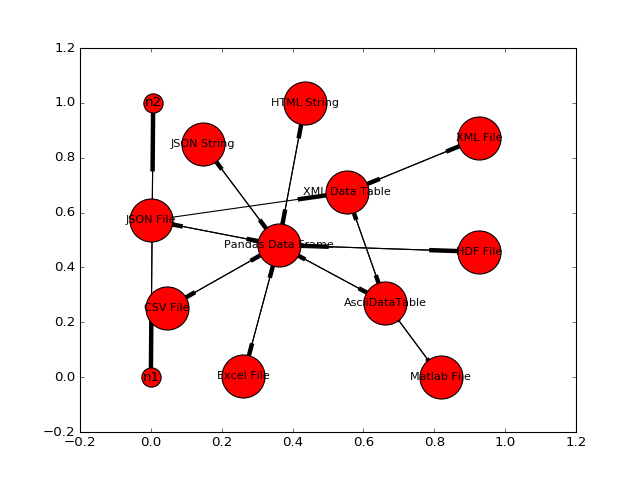

In [334]:
%matplotlib notebook
networkx.draw_networkx(new_graph,arrows=True,
                       labels={node:rect_graph.node_descriptions[index] for index, 
                               node in enumerate(rect_graph.node_names)},node_size=1500,font_size=10)


In [7]:
def html_file_to_pandas(html_file_name):
    in_file=open(html_file_name,'r')
    pandas_data_frame=pandas.read_html(in_file,header=0)
    return pandas_data_frame

In [33]:
df=pandas.read_csv("test.csv")

In [26]:
df.columns


Index([u'Frequency', u'argS11', u'magS11', u'uAa', u'uAb', u'uAd', u'uAg',
       u'uMa', u'uMb', u'uMd', u'uMg'],
      dtype='object')

In [735]:
df.columns


AttributeError: 'list' object has no attribute 'columns'

In [10]:
import lxml

In [17]:
import sqlite3
connection=sqlite3.connect('test.db')

In [18]:
cursor=connection.cursor()

In [21]:
import odo

In [96]:
def DataFrame_to_sqlite(pandas_data_frame,file_name="test.db",table_name="data"):
    """Transforms a pandas.DataFrame to a table in an sqlite database"""
    connection=sqlite3.connect(file_name)
    sql_url="sqlite:///{0}::{1}".format(file_name,table_name)
    odo.odo(pandas_data_frame,sql_url)
    return sql_url

def sqlite_to_DataFrame(sqlite_url):
    """Creates a pandas.DataFrame from a table in an sqlite database (use sqlite:///file_name::table_name)"""
    pandas_data_frame=pandas.DataFrame()
    odo.odo(sqlite_url,pandas_data_frame)
    return pandas_data_frame

In [34]:
odo.odo(df,'sqlite:///test.db::data')

Table('data', MetaData(bind=Engine(sqlite:///test.db)), Column('Frequency', FLOAT(), table=<data>, nullable=False), Column('argS11', FLOAT(), table=<data>, nullable=False), Column('magS11', FLOAT(), table=<data>, nullable=False), Column('uAa', FLOAT(), table=<data>, nullable=False), Column('uAb', FLOAT(), table=<data>, nullable=False), Column('uAd', FLOAT(), table=<data>, nullable=False), Column('uAg', FLOAT(), table=<data>, nullable=False), Column('uMa', FLOAT(), table=<data>, nullable=False), Column('uMb', FLOAT(), table=<data>, nullable=False), Column('uMd', FLOAT(), table=<data>, nullable=False), Column('uMg', FLOAT(), table=<data>, nullable=False), schema=None)

In [29]:
out=cursor.execute("SELECT * FROM data")

In [35]:
new_data_frame=odo.odo('sqlite:///test.db::data',pandas.DataFrame)

In [37]:
ascii=DataFrame_to_AsciiDataTable(new_data_frame)

In [97]:
df=sqlite_to_DataFrame('sqlite:///test.db::data')

TypeError: target of <class 'pandas.core.frame.DataFrame'> type does not support in-place append

In [95]:
df

pandas.core.frame.DataFrame